<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_RClarke/blob/master/HW5/MLTSA_rclarke_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MLTSA - Riley Clarke - HW5

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

In [0]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

In [0]:
!pip install kaggle

In [0]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [0]:
!kaggle competitions list -s PLAsTiCC

ref            deadline             category   reward  teamCount  userHasEntered  
-------------  -------------------  --------  -------  ---------  --------------  
PLAsTiCC-2018  2018-12-17 23:59:00  Featured  $25,000       1094           False  


In [0]:
!mkdir plasticc

mkdir: cannot create directory ‘plasticc’: File exists


In [0]:
cd plasticc

/content/gdrive/My Drive/plasticc


In [0]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [0]:
cd data

/content/gdrive/My Drive/plasticc/data


In [0]:
!kaggle competitions download PLAsTiCC-2018

 24% 5.00M/20.7M [00:00<00:00, 18.4MB/s]
100% 20.7M/20.7M [00:00<00:00, 52.2MB/s]
  0% 0.00/1.26M [00:00<?, ?B/s]
100% 1.26M/1.26M [00:00<00:00, 84.9MB/s]
 98% 672M/683M [00:08<00:00, 108MB/s] 
100% 683M/683M [00:08<00:00, 83.9MB/s]
 99% 672M/682M [00:07<00:00, 70.6MB/s]
100% 682M/682M [00:07<00:00, 90.6MB/s]
 99% 677M/682M [00:07<00:00, 102MB/s]
100% 682M/682M [00:07<00:00, 97.4MB/s]
 98% 672M/683M [00:10<00:00, 32.3MB/s]
100% 683M/683M [00:10<00:00, 66.5MB/s]
 99% 673M/682M [00:08<00:00, 66.4MB/s]
100% 682M/682M [00:08<00:00, 84.3MB/s]
 99% 676M/684M [00:07<00:00, 129MB/s]
100% 684M/684M [00:08<00:00, 89.5MB/s]
  0% 0.00/689k [00:00<?, ?B/s]
100% 689k/689k [00:00<00:00, 45.6MB/s]
 99% 109M/110M [00:01<00:00, 96.2MB/s] 
100% 110M/110M [00:01<00:00, 87.6MB/s]
 99% 673M/682M [00:09<00:00, 57.2MB/s]
100% 682M/682M [00:09<00:00, 75.2MB/s]
 38% 5.00M/13.2M [00:00<00:00, 30.2MB/s]
100% 13.2M/13.2M [00:00<00:00, 51.9MB/s]
 96% 137M/143M [00:02<00:00, 56.0MB/s]
100% 143M/143M [00:02<00:00, 58

In [0]:
ls

data_note.pdf.zip          test_set_batch3.csv.zip  test_set_batch9.csv.zip
sample_submission.csv.zip  test_set_batch4.csv.zip  test_set.csv.zip
test_set_batch10.csv.zip   test_set_batch5.csv.zip  test_set_metadata.csv.zip
test_set_batch11.csv.zip   test_set_batch6.csv.zip  test_set_sample.csv.zip
test_set_batch1.csv.zip    test_set_batch7.csv.zip  training_set.csv.zip
test_set_batch2.csv.zip    test_set_batch8.csv.zip  training_set_metadata.csv


In [0]:
!unzip training_set.csv.zip

Archive:  training_set.csv.zip
  inflating: training_set.csv        


In [0]:
lcvs = pd.read_csv('training_set.csv')
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [0]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


In [0]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


In [0]:
metadata = pd.read_csv('training_set_metadata.csv')
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [0]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')

In [0]:
print("The metadata dataset contains more information for each time series: (time-series, columns)", metadata.shape)

The metadata dataset contains more information for each time series: (time-series, columns) (7848, 12)


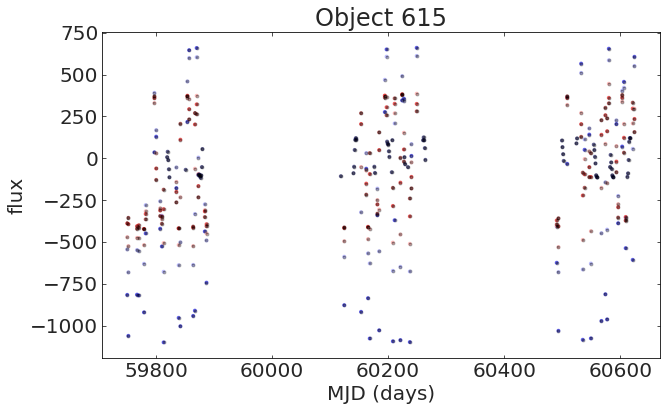

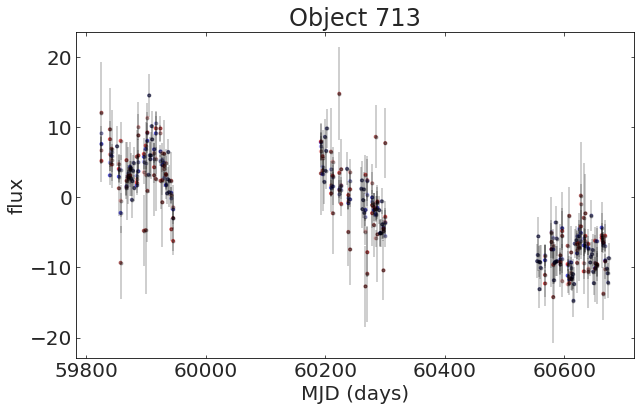

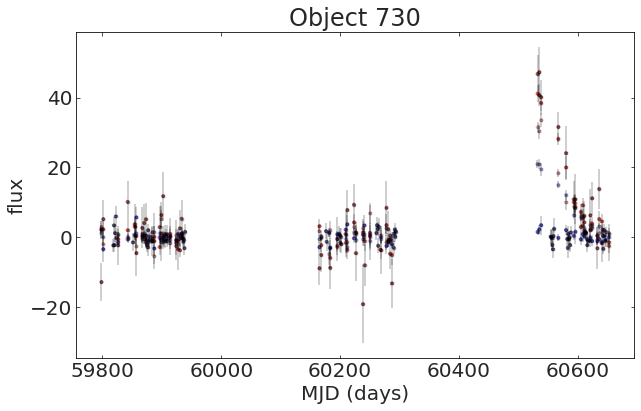

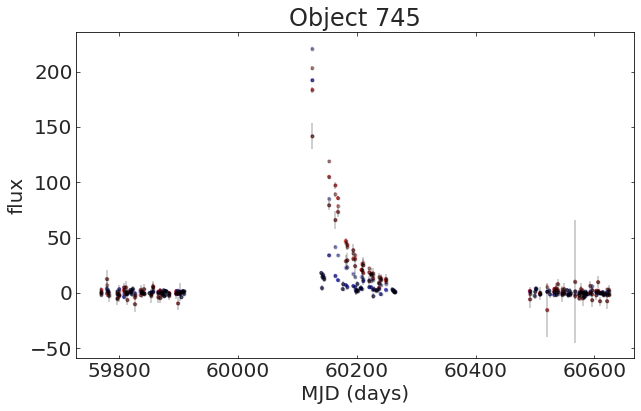

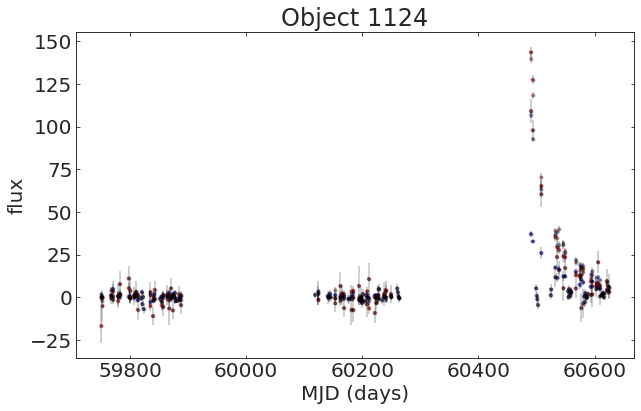

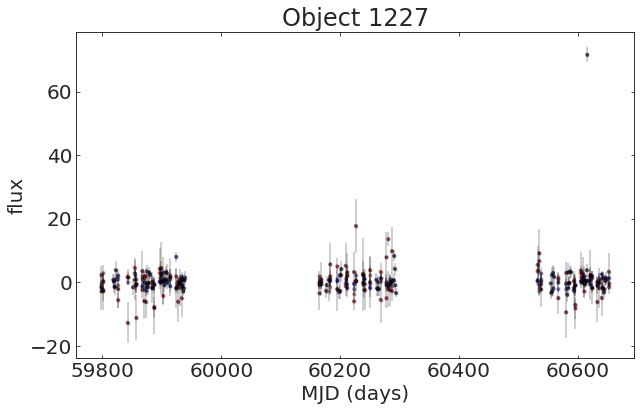

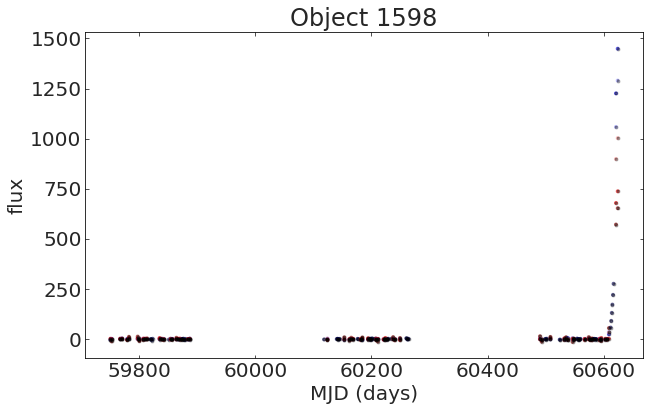

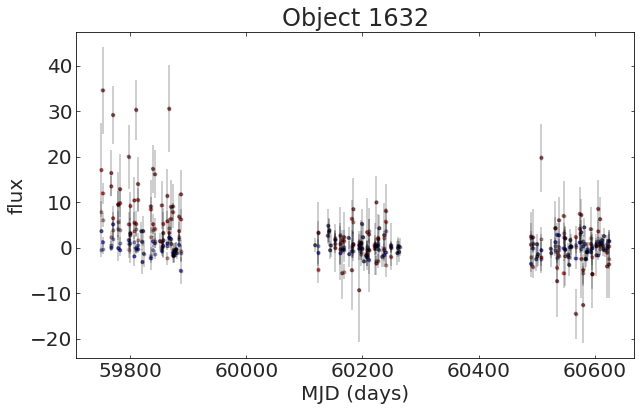

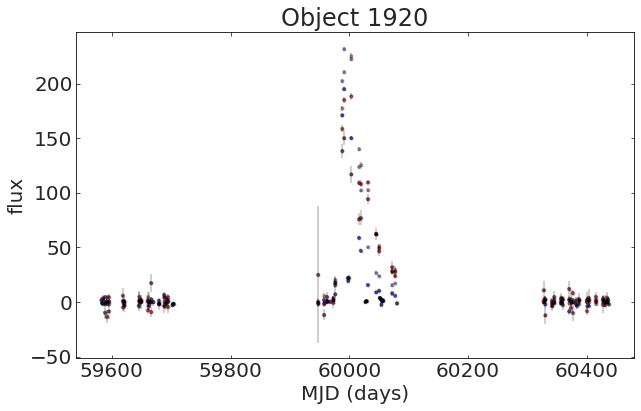

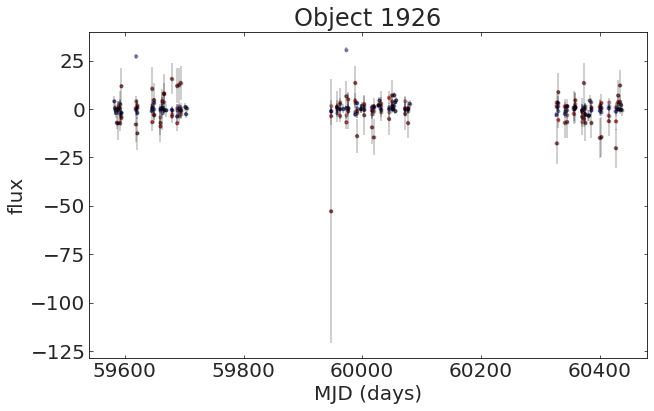

In [81]:
for id in lcvs['object_id'].unique()[0:10]:
  x = lcvs['mjd'].loc[lcvs['object_id'] == id]
  y = lcvs['flux'].loc[lcvs['object_id'] == id]
  yerr = lcvs['flux_err'].loc[lcvs['object_id'] == id]
  c = lcvs['passband'].loc[lcvs['object_id'] == id]
  plt.scatter(x,y, c=c, marker='.', cmap='seismic', alpha=0.5)
  plt.errorbar(x,y, yerr = yerr, fmt='k.', alpha=0.25)
  plt.xlabel('MJD (days)')
  plt.ylabel('flux')
  plt.title('Object '+str(id))
  plt.show()

Figure 1: Flux vs. MJD (modified Julian date) for the 1st 10 objects in the dataset. Each object has observations over ~200 days, with three ~200 day observation periods for each object. The objects were observed in 6 filters, denoted by the coloring of each datapoint. Some objects have notable outlier points with very large uncertainties, particularly objects 1920 & 1926.